## Pytorch로 논문 구현하기

In [ ]:
!pip install IPython 

In [3]:

from IPython.display import Image  # 주피터 노트북에 이미지 

### torch.nn.Module  

- 우리가 논문에 있는 모델을 구현한다고 가정해봅시다. 현재 많은 딥러닝 모델은 복잡한 구조로 되어있는 것처럼 보입니다. 하지만 사실은 몇 개의 코어 블록의 <b>반복</b>입니다.

- 블록이란, 다양한 layer가 하나의 영역을 이루며 쌓여있는 구조를 말합니다. 그렇다면 PyTorch에 구현되어 있는 linear, conv 등 여러가지 layer들을 활용해 블록으로 구성한 후, 이를 활용해 모델링을 하면 편하겠죠?

- torch의 nn.Module은 모든 layer의 Base Class입니다. nn.Module을 상속 하여 새로운 block을 정의하고 앞서 존재하는 다양한 torch의 layer을 가져와 새로운 Neural Network class를 쉽게 만들 수 있습니다. 

- nn.Parameter와 같은 함수를 통해 실제 학습하는 tensor를 정의할 수 있지만, 대부분 경우 torch에 구현되어 있는 layer를 가져와서 사용하기 때문에 직접 Parameter를 정의하여 활용하는 경우는 많이 없습니다.


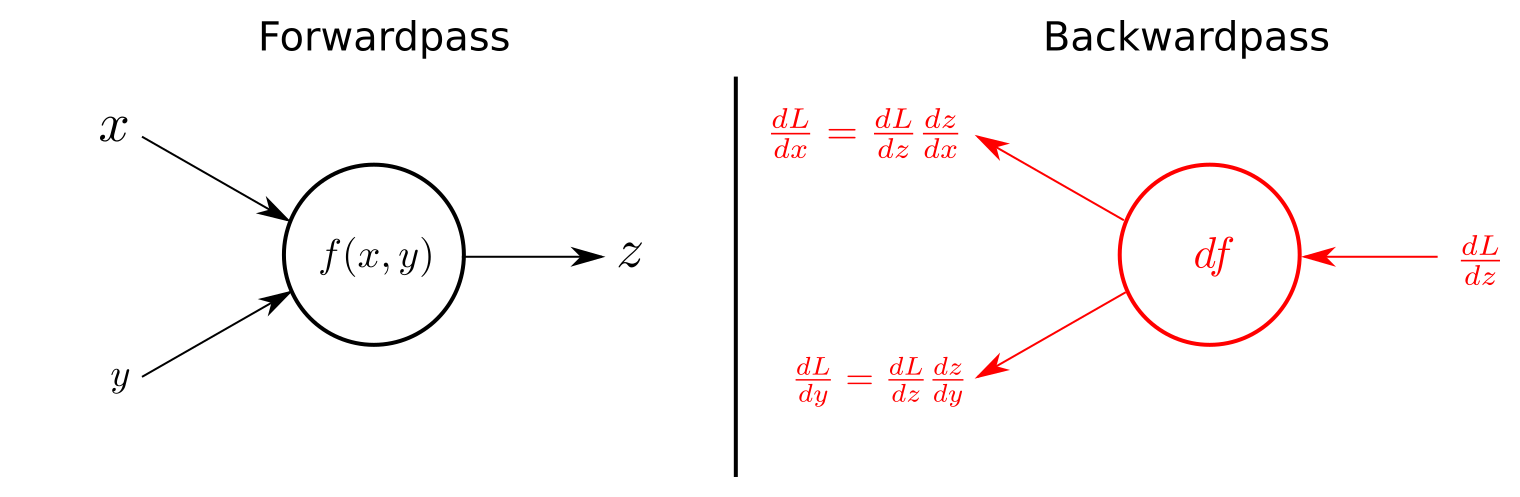

In [2]:
Image("img/foward_backward.png")

### nn.parameter
- nn.Module 내에 attribute가 될 때는 required_grad=True로 지정되어 학습 대상이 되는 Tensor
- 우리가 직접 지정할 일은 잘 없음: 대부분의 layer에는 weights 값들이 지정되어 있음

In [1]:
import torch
from torch import nn
from torch import Tensor

In [2]:
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weights = nn.Parameter(
        torch.randn(in_features, out_features))
        self.bias = nn.Parameter(torch.randn(out_features))
    
    def forward(self, x : Tensor):
        return x @ self.weights + self.bias


### nn.Module 재정의
1\) \__init\__
모델에서 활용될 layer을 정의합니다. nn.Parameter를 활용해 학습시킬 새로운 parameter를 정의하기도 합니다.

2\) 'forward' 
\__init\__ 에서 정의한 layer들을 활용해 모델의 순전파 과정을 구현합니다. 강의에서 소개된 forward 과정이 실행됩니다.

In [4]:
x = torch.randn(5, 7)
x

tensor([[ 0.3253, -0.2985,  0.0113, -0.5563, -0.5541,  1.6766,  0.1664],
        [ 0.9573, -1.2245, -0.0554,  1.7361, -0.1635,  0.1126,  1.1205],
        [-0.8737, -0.7709, -0.0653,  0.7018,  2.4704,  0.2377,  1.1217],
        [-1.3073, -0.1586, -0.0841,  0.3807,  1.3677,  0.7413,  0.0425],
        [ 1.7846,  0.0813,  0.9136,  1.2305,  0.5477,  0.1964, -0.2452]])

In [6]:
layer = MyLiner(7, 12)
layer(x)


tensor([[-1.8487, -1.2776,  1.5769,  2.3196, -0.5413, -1.3619, -1.4921,  0.8164,
          1.6160, -1.3293,  3.4587,  0.6824],
        [-2.7842,  4.1071,  3.6181,  0.3221, -1.2922,  4.0706, -0.0882,  0.5391,
         -0.7766, -2.6756,  3.3417, -0.2672],
        [-1.4553,  6.0538, -0.4558,  0.0995,  8.2378,  3.5040, -0.1945,  0.9192,
          2.6412, -4.3340, -2.5388,  3.0676],
        [ 0.4404,  4.0186, -2.4355,  1.7207,  4.7614, -0.0730,  0.1515,  1.6366,
          1.4637,  0.8438, -1.1846,  0.1039],
        [-0.8922,  2.9532, -1.6360, -0.9218, -1.2384, -0.6468, -0.7000, -0.3826,
         -1.1136, -4.8323,  1.8855,  0.3174]], grad_fn=<AddBackward0>)

In [7]:
layer(x).shape

torch.Size([5, 12])

### Backward

1. Loss function

Loss function란, 입력값(Input)에 대한 Model의 출력값(Output)과  정답값(Label)의 차이를 비교해 모델의 출력값이 얼마나 잘 예측했는가를 나타내는 함수입니다. Loss function에는 여러가지 함수 있는데 많이 쓰이는 함수에 대해 소개하면,

MSE(Mean Squared Error) Loss  : 회귀(Regression)문제에서 많이 쓰이는 함수, 출력값(Output)과 정답값(Label)의 차이의 제곱에 대해 측정한다.
CE(Cross Entropy) Loss: 분류(Classification)문제에서 많이 쓰이는 함수
 

2. Backward

Forward를 수행했다면, 이제 Backward를 할 차례입니다!

1. (Forward 과정을 통해 얻어진) Model의 출력값(Output)과 정답값(Label)의 차이를 Loss Function을 통해 계산하여 Loss 값을 얻습니다.

2. Backward는 Loss 값을 활용해 미분을 수행하고, back-propagation을 통해 Parameter(weight)를 update합니다(epoch이 돌아갈때마다)

 

해당 과정을 통해 네트워크가 더 나은 Parameter(weight)를 가질 수 있게 됩니다. 코드 상에서 위의 과정이 어떻게 진행되는지 파악하는 것이 가장 중요합니다.

 

참고로, 다양한 loss function은 아래 공식문서에서 확인하실 수 있습니다.

-> https://pytorch.org/docs/stable/nn.html#loss-functions

In [1]:
for epoch in range(epochs):
# Clear gradient buffers because we don't want any gradient from previous epoch to carry forward
    optimizer.zero_grad()
    # get output from the model, given the inputs
    outputs = model(inputs)
# get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
# get gradients w.r.t to parameters
    loss.backward()
# update parameters
    optimizer.step()

NameError: name 'epochs' is not defined

실제 backward는 Module 단계에서 직접 지정가능
- Module에서 backward 와 optimizer 오버라이딩
- 사용자가 직접 미분 수식을 써야하는 부담
- 쓸일은 없으나 순서는 이해할 필요는 있음

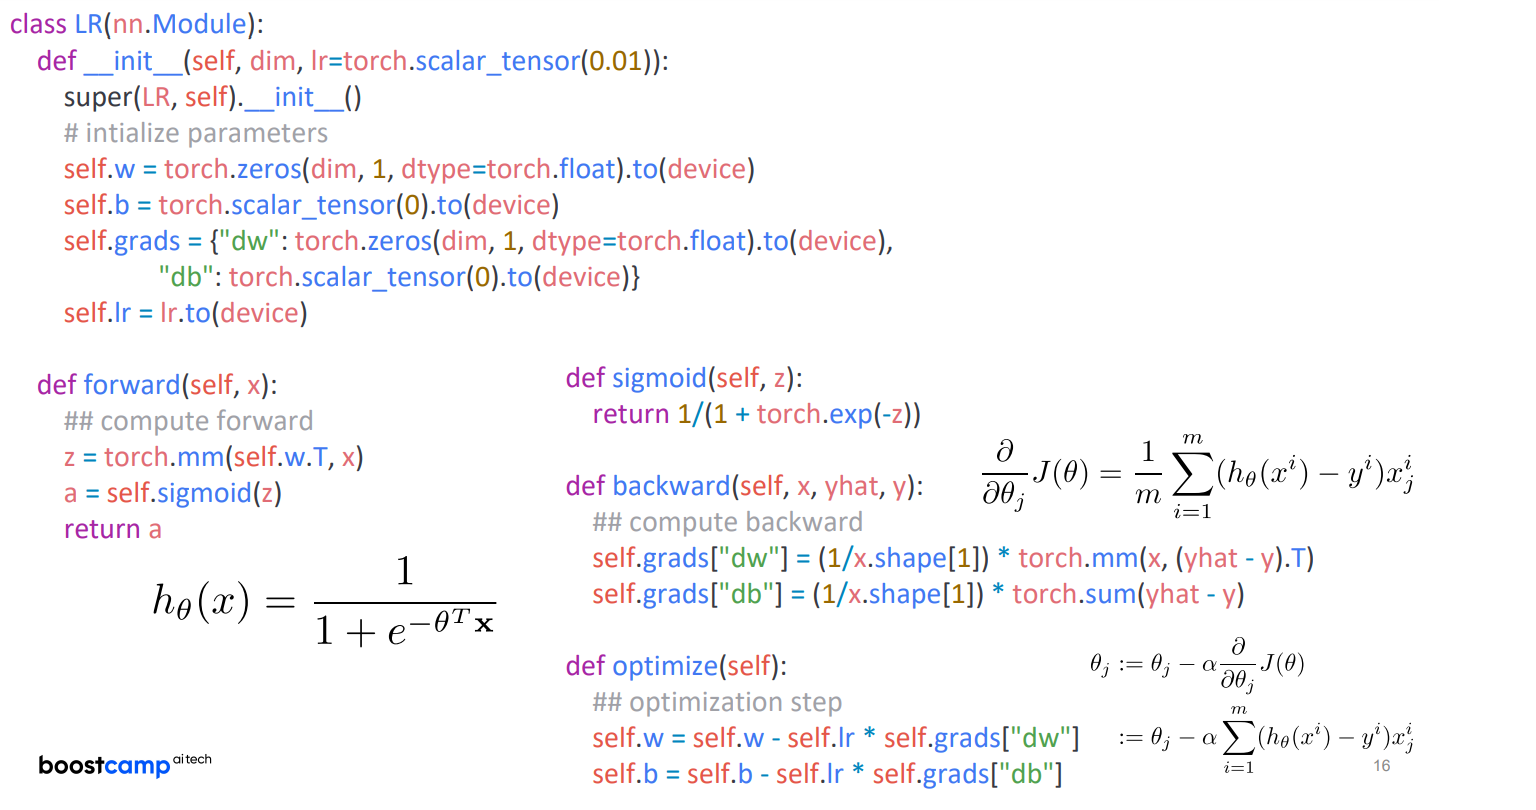

In [4]:
Image("img/autograd.png")

- def backward -> 값을 미분
- def optimize -> 미분한 값을 업데이트

## Dataset 관련

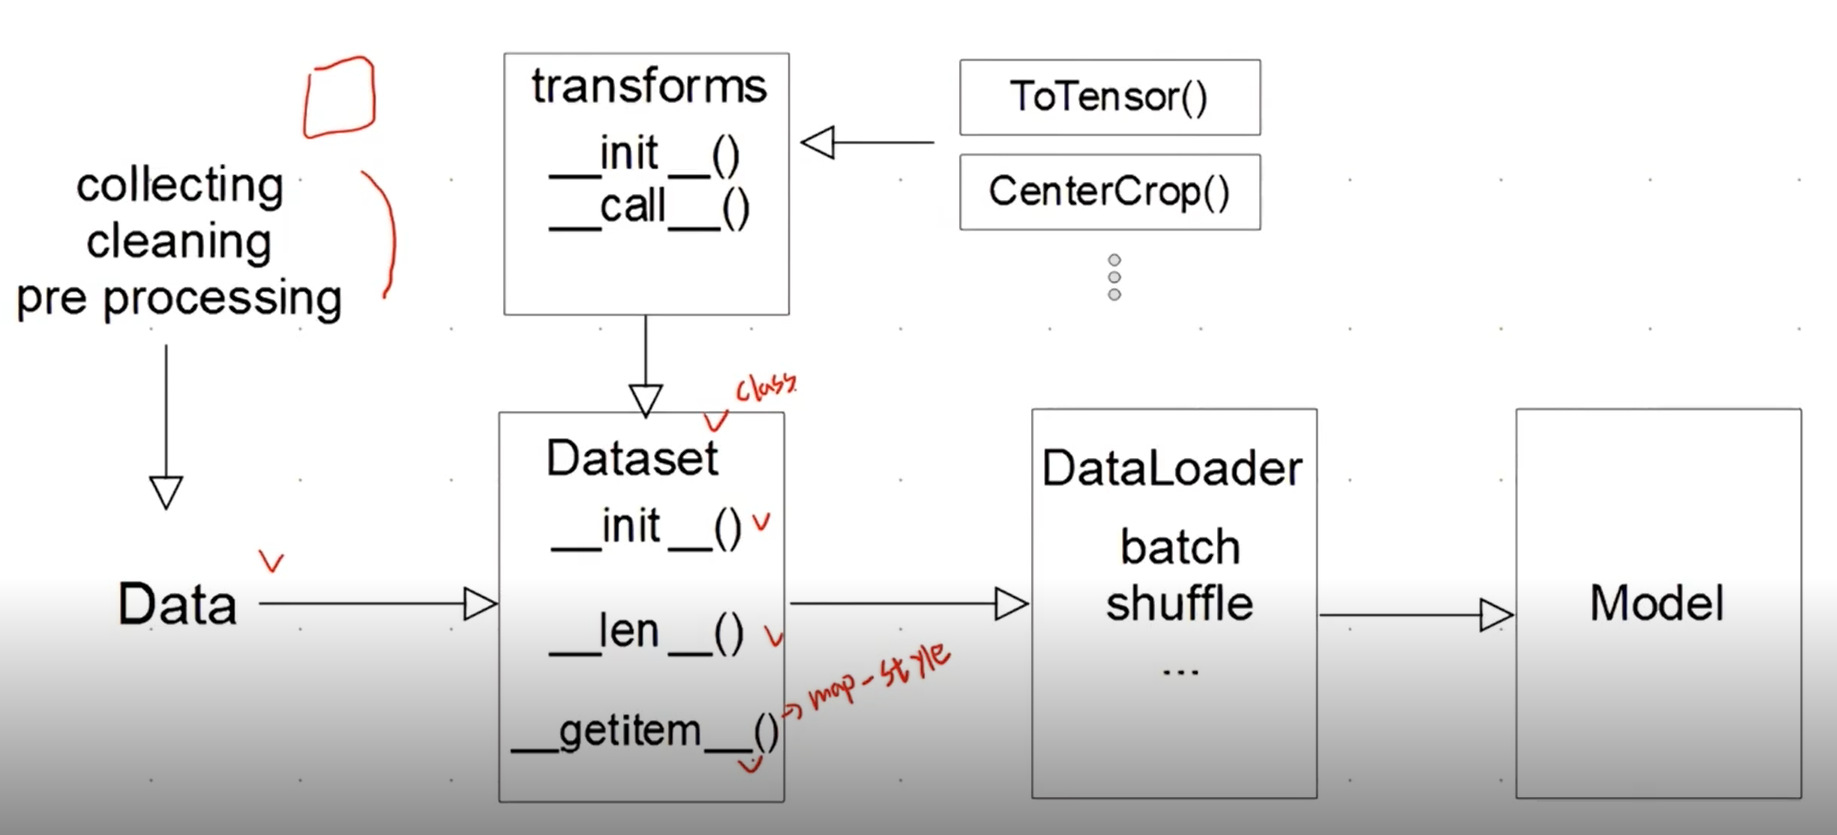

In [5]:
Image("img/dataset.png")

1. data 모으기 + 전처리
2. dataset: init, len(길이), getitem(하나의 data를 불러올때 어떤식으로 반환할지)
3. transform: data변형, 전처리 -> tensor로 바꿔줌 전처리해주는 부분과 tensor로 바꿔주는 부분이 다름 
4. dataloader: dataset을 묶어서 model feeding(batch, shuffle)

### DATASET 클래스 
- dataset의 입력 형태를 정의, 표준화
- 이미지, 오디오 등에 따라 다름 -> data 형태에 따라 함수를 다르게 정의함
- tensor 변화 등은 학습에 필요한 시점에 변환 0> 모든 것을 데이터 생성 시점에 처리할 필요는 없음 
- 표준화 된 처리방법 제공 필요, 최근에는 huggingface 등 표준화 된 라이브러리 사용
- cpu에서 data변환(tensor로), gpu에서는 data 처리?

In [7]:
import torch 
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, text, labels):
        self.labels = labels
        self.data = text 
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return {"TEXT": self.labels[idx], "Class": self.data[idx]}

### DATALOADER
- data의 batch를 생성해주는 클래스
- 학습 직전(gpu로 feed전) 데이터의 변환
- tensor로 변환 + batch로 변환
- 병렬 처리

In [8]:
text = ['Happy', 'Amazing', 'Sad', 'Unhapy', 'Glum']
labels = ['Positive', 'Positive', 'Negative', 'Negative', 'Negative']
# Dataset 생성
MyDataset = CustomDataset(text, labels)
# DataLoader 생성(Batch의 크기 2, 매 epoch마다 데이터셋 shuffle)
MyDataLoader = DataLoader(MyDataset, batch_size=2, shuffle=True)
#dataloader는 iterable 한 객체 iterator
next(iter(MyDataLoader))

{'TEXT': ['Positive', 'Negative'], 'Class': ['Amazing', 'Unhapy']}

In [10]:
for dataset in MyDataLoader:
  print(dataset)
# {'Text': ['Glum', 'Unhapy'], 'Class': ['Negative', 'Negative']}
# {'Text': ['Sad', 'Amazing'], 'Class': ['Negative', 'Positive']}
# {'Text': ['Happy'], 'Class': ['Positive']}

{'TEXT': ['Negative', 'Negative'], 'Class': ['Unhapy', 'Glum']}
{'TEXT': ['Positive', 'Positive'], 'Class': ['Amazing', 'Happy']}
{'TEXT': ['Negative'], 'Class': ['Sad']}


## data loader의 인자 + collate_fn
- sampler: smapling 기법 
- collate_fn: [data list]을 [d,d,d] [l,l,l]로 나오게함 -> text size처리시 사용, text(nlp) 등에서 variable의 size를 고정해줄때?(data크기를 비슷하게?)

In [13]:
from torch.utils.data import Dataset, DataLoader 
import torch

class ExampleDataset(Dataset):
    def __init__(self, num):
        self.num = num
    
    def __len__(self):
        return self.num
    
    def __getitem__(self, idx):
        return {"X":torch.tensor([idx] * (idx+1), dtype=torch.float32), 
                "y": torch.tensor(idx, dtype=torch.float32)}

dataset_example = ExampleDataset(num = 10)
dataloader_example = torch.utils.data.DataLoader(dataset_example, batch_size= 1)
for d in dataloader_example:
    print('X : ',d['X'])
#size가 다른 dataset 존재

X :  tensor([[0.]])
X :  tensor([[1., 1.]])
X :  tensor([[2., 2., 2.]])
X :  tensor([[3., 3., 3., 3.]])
X :  tensor([[4., 4., 4., 4., 4.]])
X :  tensor([[5., 5., 5., 5., 5., 5.]])
X :  tensor([[6., 6., 6., 6., 6., 6., 6.]])
X :  tensor([[7., 7., 7., 7., 7., 7., 7., 7.]])
X :  tensor([[8., 8., 8., 8., 8., 8., 8., 8., 8.]])
X :  tensor([[9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])


In [14]:
dataloader_example = torch.utils.data.DataLoader(dataset_example, batch_size = 2)
for d in dataloader_example:
    print(d['X'])

RuntimeError: stack expects each tensor to be equal size, but got [1] at entry 0 and [2] at entry 1

위와 같이 오류가 나는 걸 볼 수 있는데요, 이는 같은 배치 안의 input(X)의 길이가 다르기 때문입니다. 이 오류를 해결하기 위해서는 input의 길이를 동일하게 맞춰주어야 함으로, 같은 배치 안에 길이가 가장 긴 input에 맞춰 다른 input들에 임의로 0값을 넣어줍니다. (Zero padding)

In [15]:
def my_collate_fn(samples):
    collate_X = []
    collate_y = []
    max_len = max([len(sample['X']) for sample in samples])
    for sample in samples:
        diff = max_len-len(sample['X'])
        if diff > 0:
            zero_pad = torch.zeros(size=(diff,))
            collate_X.append(torch.cat([sample['X'], zero_pad], dim=0))
        else:
            collate_X.append(sample['X'])
    collate_y = [sample['y'] for sample in samples]
    return {'X': torch.stack(collate_X),
             'y': torch.stack(collate_y)}

dataloader_example = torch.utils.data.DataLoader(dataset_example, 
                                                 batch_size=2,
                                                 collate_fn=my_collate_fn)
for d in dataloader_example:
    print(d['X'], d['y'])

tensor([[0., 0.],
        [1., 1.]]) tensor([0., 1.])
tensor([[2., 2., 2., 0.],
        [3., 3., 3., 3.]]) tensor([2., 3.])
tensor([[4., 4., 4., 4., 4., 0.],
        [5., 5., 5., 5., 5., 5.]]) tensor([4., 5.])
tensor([[6., 6., 6., 6., 6., 6., 6., 0.],
        [7., 7., 7., 7., 7., 7., 7., 7.]]) tensor([6., 7.])
tensor([[8., 8., 8., 8., 8., 8., 8., 8., 8., 0.],
        [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]]) tensor([8., 9.])
